In [62]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import csv
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
import time
import requests
from bs4 import BeautifulSoup
headers = {
    "user-agent": "Mozilla / 5.0(Windows NT 10.0;Win64;x64) AppleWebKit / 537.36(KHTML, likeGecko) Chrome / 84.0.4147.89Safari / 537.36Edg / 84.0.522.40"
}
for i in range(1, 13):
    time.sleep(5)
    # 把1转换为01
    # 获取2018年空气质量数据
    #http://www.tianqihoubao.com/aqi/changsha.html
    url = 'http://www.tianqihoubao.com/aqi/changsha.html'  
    response = requests.get(url=url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    tr = soup.find_all('tr')
    # 去除标签栏
    

In [61]:
data=pd.read_csv('air_mianyang_2018.csv')
print("数据相关信息：\n")

数据相关信息：



In [4]:
print (data.describe())
print("DataHead")

               id  Quality_grade        AQI    AQI_rank          PM   \
count  688.000000     688.000000  688.000000  688.000000  688.000000   
mean   344.500000       1.803779   66.257267  182.501453   41.700581   
std    198.752778       0.776764   34.564992   95.005585   29.079280   
min      1.000000       1.000000   13.000000    3.000000    3.000000   
25%    172.750000       1.000000   41.750000   99.750000   20.750000   
50%    344.500000       2.000000   59.000000  186.000000   35.000000   
75%    516.250000       2.000000   82.000000  255.000000   56.000000   
max    688.000000       6.000000  274.000000  366.000000  223.000000   

             PM10         So2         No2          Co          O3  
count  688.000000  688.000000  688.000000  688.000000  688.000000  
mean    67.265988    5.065407   29.623547    0.684506   50.793605  
std     42.537736    1.656032   11.549873    0.194546   25.673708  
min      7.000000    2.000000    7.000000    0.220000    3.000000  
25%     36.

In [5]:
print (data.head())

   id      Date  Quality_grade  AQI   AQI_rank   PM   PM10  So2  No2    Co  O3
0   1  2018/1/1              3   125        232   88   197    8   54  1.17  42
1   2  2018/1/2              3   109        230   81   146    6   42  0.98  30
2   3  2018/1/3              2    53        144   35    58    4   17  0.76  65
3   4  2018/1/4              1    31         76   19    25    3   19  1.10  44
4   5  2018/1/5              2    51        131   35    43    3   16  1.11  27


In [6]:
print (data.shape)

(688, 11)


In [7]:
index=data.index

In [8]:
class_names=np.unique(data.iloc[:,1])

In [9]:
print("Classnames:")

Classnames:


In [10]:
print (class_names)

['2018/1/1' '2018/1/10' '2018/1/11' '2018/1/12' '2018/1/13' '2018/1/14'
 '2018/1/15' '2018/1/16' '2018/1/17' '2018/1/18' '2018/1/19' '2018/1/2'
 '2018/1/20' '2018/1/21' '2018/1/22' '2018/1/23' '2018/1/24' '2018/1/25'
 '2018/1/26' '2018/1/27' '2018/1/28' '2018/1/29' '2018/1/3' '2018/1/30'
 '2018/1/31' '2018/1/4' '2018/1/5' '2018/1/6' '2018/1/7' '2018/1/8'
 '2018/1/9' '2018/10/1' '2018/10/10' '2018/10/11' '2018/10/12'
 '2018/10/13' '2018/10/14' '2018/10/15' '2018/10/16' '2018/10/17'
 '2018/10/18' '2018/10/19' '2018/10/2' '2018/10/20' '2018/10/21'
 '2018/10/22' '2018/10/23' '2018/10/24' '2018/10/25' '2018/10/26'
 '2018/10/27' '2018/10/28' '2018/10/29' '2018/10/3' '2018/10/30'
 '2018/10/31' '2018/10/4' '2018/10/5' '2018/10/6' '2018/10/7' '2018/10/8'
 '2018/10/9' '2018/11/1' '2018/11/10' '2018/11/11' '2018/11/12'
 '2018/11/13' '2018/11/14' '2018/11/15' '2018/11/16' '2018/11/17'
 '2018/11/18' '2018/11/19' '2018/11/2' '2018/11/20' '2018/11/21'
 '2018/11/22' '2018/11/23' '2018/11/24' '2018/11/

In [11]:
data_train, data_test= train_test_split(data,test_size=0.1, random_state=0)

In [12]:
print ("训练集统计描述：\n",data_train.describe().round(2))

训练集统计描述：
            id  Quality_grade    AQI   AQI_rank      PM     PM10     So2  \
count  619.00         619.00  619.00     619.00  619.00  619.00  619.00   
mean   342.11           1.80   66.29     183.94   41.62   67.19    5.05   
std    198.25           0.76   33.91      94.95   28.42   42.07    1.67   
min      1.00           1.00   13.00       3.00    3.00    7.00    2.00   
25%    169.50           1.00   41.50     105.50   21.00   36.00    4.00   
50%    341.00           2.00   59.00     187.00   35.00   58.00    5.00   
75%    513.50           2.00   82.00     257.00   55.50   90.00    6.00   
max    688.00           5.00  244.00     366.00  194.00  258.00   11.00   

          No2      Co      O3  
count  619.00  619.00  619.00  
mean    29.47    0.68   51.14  
std     11.51    0.19   25.96  
min      7.00    0.22    3.00  
25%     21.00    0.55   31.00  
50%     28.00    0.66   48.00  
75%     37.00    0.78   68.00  
max     71.00    1.41  143.00  


In [13]:
print ("验证集统计描述：\n",data_test.describe().round(2))

验证集统计描述：
            id  Quality_grade    AQI   AQI_rank      PM     PM10    So2    No2  \
count   69.00          69.00   69.00      69.00   69.00   69.00  69.00  69.00   
mean   365.93           1.81   65.93     169.57   42.41   67.94   5.20  30.97   
std    203.38           0.91   40.22      95.22   34.70   46.89   1.53  11.88   
min      2.00           1.00   20.00      20.00    9.00   15.00   3.00  12.00   
25%    197.00           1.00   43.00      82.00   18.00   36.00   4.00  22.00   
50%    391.00           2.00   58.00     179.00   35.00   58.00   5.00  30.00   
75%    537.00           2.00   82.00     241.00   56.00   88.00   6.00  37.00   
max    687.00           6.00  274.00     354.00  223.00  289.00  10.00  80.00   

          Co      O3  
count  69.00   69.00  
mean    0.69   47.68  
std     0.20   22.88  
min     0.31    3.00  
25%     0.56   33.00  
50%     0.68   45.00  
75%     0.77   66.00  
max     1.64  104.00  


In [14]:
print ("训练集信息：\n",data_train.iloc[:,2].value_counts())  

训练集信息：
 2    309
1    227
3     64
4     16
5      3
Name: Quality_grade, dtype: int64


In [15]:
print ("验证集信息：\n",data_test.iloc[:,2].value_counts())   

验证集信息：
 2    33
1    27
3     7
6     1
5     1
Name: Quality_grade, dtype: int64


In [16]:
X_train=data_train.iloc[:,4:10]#  data_train.iloc[:,0:-2]

In [17]:
X_test=data_test.iloc[:,4:10] #data_train.iloc[:,0:-2]

In [18]:
feature=data_train.iloc[:,4:10].columns

In [19]:
print (feature)

Index(['AQI_rank ', 'PM ', 'PM10', 'So2', 'No2', 'Co'], dtype='object')


In [20]:
y_train=data_train.iloc[:,2]

In [21]:
y_test=data_test.iloc[:,2]

In [22]:
data.drop([u'Quality_grade'],axis = 1).corr()

,id,AQI,AQI_rank,PM,PM10,So2,No2,Co,O3
id,1.000000,-0.298468,-0.204237,-0.234409,-0.279586,-0.250622,-0.102260,-0.140745,-0.297132
AQI,-0.298468,1.000000,0.789253,0.970638,0.954621,0.562791,0.708171,0.666340,-0.111486
AQI_rank,-0.204237,0.789253,1.000000,0.724123,0.765309,0.480209,0.594996,0.451776,0.083542
PM,-0.234409,0.970638,0.724123,1.000000,0.931480,0.542584,0.728159,0.736638,-0.276718
PM10,-0.279586,0.954621,0.765309,0.931480,1.000000,0.578326,0.725723,0.605428,-0.160631
So2,-0.250622,0.562791,0.480209,0.542584,0.578326,1.000000,0.678295,0.511342,-0.034158
No2,-0.102260,0.708171,0.594996,0.728159,0.725723,0.678295,1.000000,0.655065,-0.270842
Co,-0.140745,0.666340,0.451776,0.736638,0.605428,0.511342,0.655065,1.000000,-0.423484
O3,-0.297132,-0.111486,0.083542,-0.276718,-0.160631,-0.034158,-0.270842,-0.423484,1.000000


In [23]:
import seaborn as sns
sns.set(style="ticks", color_codes=True);
palette = sns.xkcd_palette(['dark blue', 'dark green', 'gold', 'orange'])

In [24]:
print(palette)

[(0.0, 0.011764705882352941, 0.3568627450980392), (0.011764705882352941, 0.20784313725490197, 0.0), (0.8588235294117647, 0.7058823529411765, 0.047058823529411764), (0.9764705882352941, 0.45098039215686275, 0.023529411764705882)]


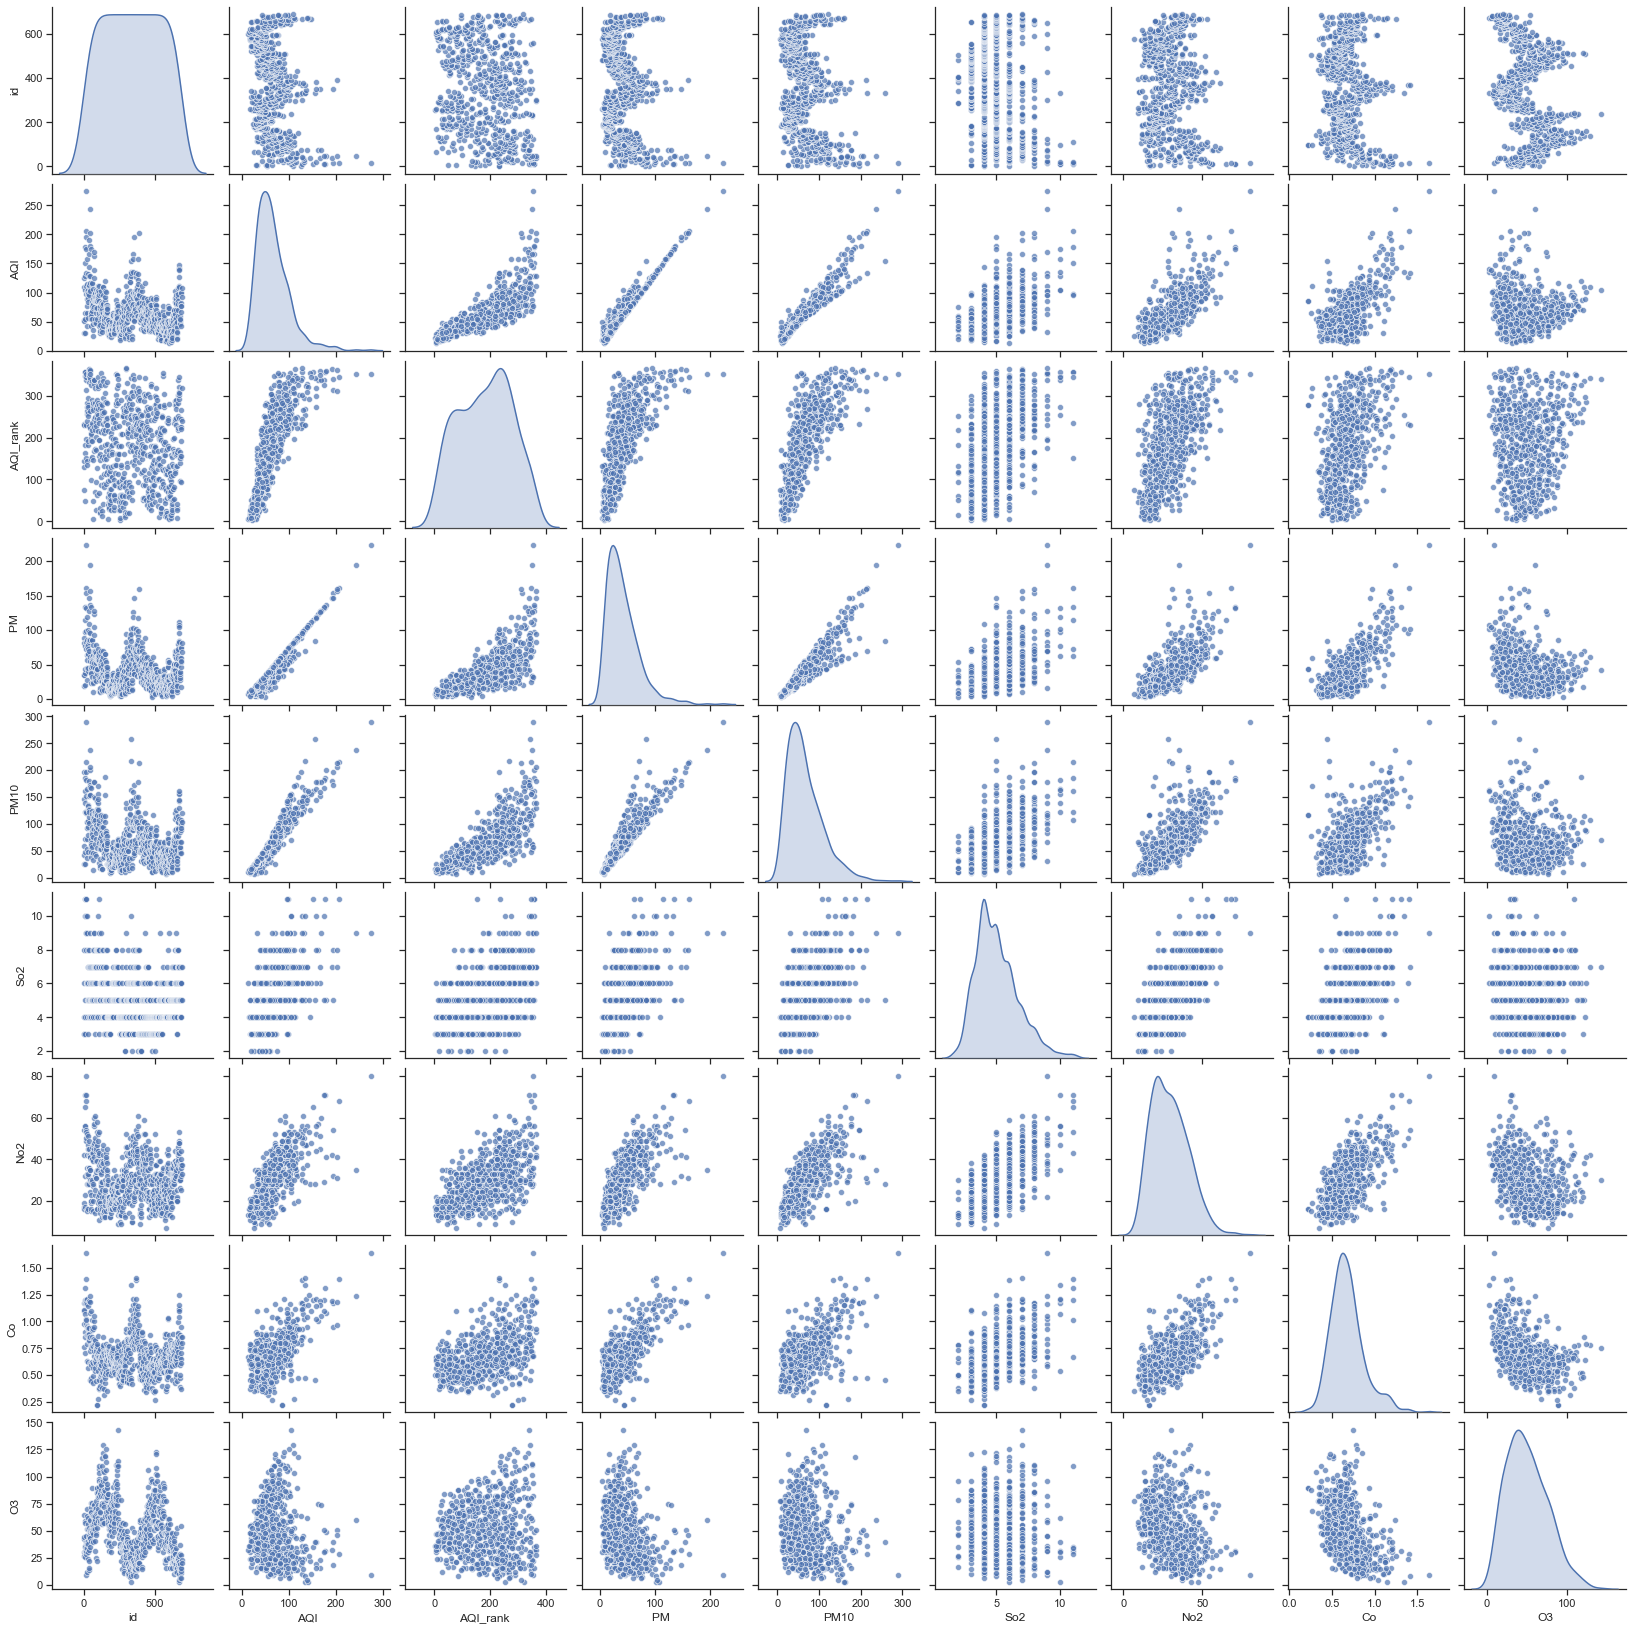

In [25]:
sns.pairplot(data.drop([u'Quality_grade'],axis = 1), diag_kind = 'kde', plot_kws=dict(alpha = 0.7))
plt.show()# 画散点图矩阵

In [26]:
from sklearn.model_selection import   GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
criterion=['gini','entropy']
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]

In [27]:
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'criterion':criterion,
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap}

In [28]:
# #构建模型 随机森林
clf= RandomForestRegressor()
clf_random = RandomizedSearchCV(estimator=clf, param_distributions=random_grid,
                              n_iter = 10,  
                              cv = 3, verbose=2, random_state=42, n_jobs=1)

In [29]:
#回归
clf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, criterion=entropy, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, criterion=entropy, bootstrap=False, total=   0.1s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, criterion=entropy, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, criterion=entropy, bootstrap=False, total=   0.1s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, criterion=entropy, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, criterion=entropy, bootstrap=False, total=   0.1s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=100, criterion=entropy, bootstrap=False 


D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=100, criterion=entropy, bootstrap=False, total=   0.2s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=100, criterion=entropy, bootstrap=False 


D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=100, criterion=entropy, bootstrap=False, total=   0.2s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=100, criterion=entropy, bootstrap=False 


D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=100, criterion=entropy, bootstrap=False, total=   0.2s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, criterion=gini, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, criterion=gini, bootstrap=True, total=   0.1s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, criterion=gini, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, criterion=gini, bootstrap=True, total=   0.1s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, criterion=gini, bootstrap=True 


D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, criterion=gini, bootstrap=True, total=   0.1s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, criterion=gini, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, criterion=gini, bootstrap=False, total=   0.1s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, criterion=gini, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, criterion=gini, bootstrap=False, total=   0.1s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, criterion=gini, bootstrap=False 


D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, criterion=gini, bootstrap=False, total=   0.1s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, criterion=gini, bootstrap=False 


D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, criterion=gini, bootstrap=False, total=   0.4s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, criterion=gini, bootstrap=False 


D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, criterion=gini, bootstrap=False, total=   0.4s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, criterion=gini, bootstrap=False 


D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, criterion=gini, bootstrap=False, total=   0.4s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, criterion=gini, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, criterion=gini, bootstrap=False, total=   0.1s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, criterion=gini, bootstrap=False 


D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, criterion=gini, bootstrap=False, total=   0.1s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, criterion=gini, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, criterion=gini, bootstrap=False, total=   0.1s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, criterion=entropy, bootstrap=True 


D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, criterion=entropy, bootstrap=True, total=   0.2s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, criterion=entropy, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, criterion=entropy, bootstrap=True, total=   0.2s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, criterion=entropy, bootstrap=True 


D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, criterion=entropy, bootstrap=True, total=   0.2s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, criterion=entropy, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, criterion=entropy, bootstrap=True, total=   0.2s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, criterion=entropy, bootstrap=True 


D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, criterion=entropy, bootstrap=True, total=   0.2s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, criterion=entropy, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, criterion=entropy, bootstrap=True, total=   0.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, criterion=gini, bootstrap=False 


D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, criterion=gini, bootstrap=False, total=   0.3s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, criterion=gini, bootstrap=False 


D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, criterion=gini, bootstrap=False, total=   0.3s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, criterion=gini, bootstrap=False 


D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, criterion=gini, bootstrap=False, total=   0.3s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, criterion=entropy, bootstrap=False 


D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, criterion=entropy, bootstrap=False, total=   0.4s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, criterion=entropy, bootstrap=False 


D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, criterion=entropy, bootstrap=False, total=   0.4s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, criterion=entropy, bootstrap=False 


D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Application\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Application\Anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, criterion=entropy, bootstrap=False, total=   0.4s


KeyError: 'entropy'

In [30]:
print (clf_random.best_params_)

{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 80, 'criterion': 'entropy', 'bootstrap': False}


In [31]:
rf=RandomForestRegressor(criterion='mse',bootstrap=False,max_features='sqrt', max_depth=20,min_samples_split=10,n_estimators=1200,min_samples_leaf=2)
rf.fit(X_train, y_train) 
y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)
print(rf.feature_importances_)

[0.14999042 0.35372765 0.36122544 0.00605498 0.03995696 0.08904456]


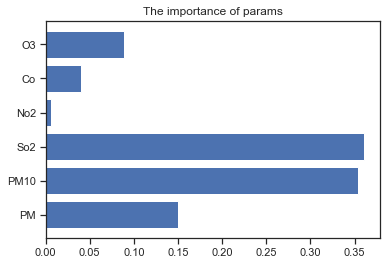

In [33]:
#变量重要性  
plt.barh(range(len(rf.feature_importances_)), rf.feature_importances_,tick_label=['PM','PM10','So2','No2','Co','O3'])#,tick_label = class_names
plt.title('The importance of params')
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error,r2_score
print ("决策树模型评估--训练集：")
print ('训练r^2:',rf.score(X_train,y_train))

决策树模型评估--训练集：
训练r^2: 0.9719830218386628


In [36]:
print ('均方差',mean_squared_error(y_train,y_train_pred))

均方差 0.016201633044908344


In [37]:
print ('绝对差',mean_absolute_error(y_train,y_train_pred))

绝对差 0.06026567428263686


In [38]:
print ('解释度',explained_variance_score(y_train,y_train_pred))

解释度 0.9719830218386628


In [39]:
print ("决策树模型评估--验证集：")
print ('验证r^2:',rf.score(X_test,y_test))

决策树模型评估--验证集：
验证r^2: 0.8892125149471677


In [40]:
print ('均方差',mean_squared_error(y_test,y_test_pred))

均方差 0.09079873276121649


In [41]:
print ('绝对差',mean_absolute_error(y_test,y_test_pred))

绝对差 0.13726155969634182


In [42]:
print ('解释度',explained_variance_score(y_test,y_test_pred))

解释度 0.8896093084084857


In [60]:
data_pred=pd.read_csv('predict.csv',index_col=0,encoding='gbk')
index=data_pred.index
print("预测:")
print(index)
y_pred=rf.predict(data_pred.values[:,4:10])
result_reg=pd.DataFrame(index)
result_reg['AQI']=y_pred
result_reg.to_csv('result_reg_city.txt',encoding='gbk')

预测:
Int64Index([1], dtype='int64', name='锘縤d')
